In [21]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=400
import numpy as np
import random
scale=0.5
x1=np.random.normal(loc=[random.random()*3,random.random()*3],scale=scale,size=[500,2])
x2=np.random.normal(loc=[random.random()*3,random.random()*3],scale=scale,size=[500,2])

+ 规范化增广样本向量

In [22]:
x_train=[]
y_train=[]
for i in range(500):
    rand=random.random()
    new_sample=np.random.choice(500)
    if(rand<0.5):
        x_train.append(x1[new_sample]+random.random()*0.2-0.1)
        y_train.append(1)
    else:
        x_train.append(x2[new_sample]+random.random()*0.2-0.1)
        y_train.append(2)
x_train=np.array(x_train)
x_train_new=[]
for i in range(500):
    temp=np.array([1,x_train[i][0],x_train[i][1]])
    x_train_new.append(temp)
x_train=np.array(x_train_new)
y_train=np.array(y_train)
x_new=np.array(x_train)
for i in range(500):
    if(y_train[i]==2):
        x_new[i]=-x_new[i]
Y=np.matrix(x_new)

+ 伪逆法

In [23]:
b=[1]*500
b=np.matrix(b).T
alpha=(np.linalg.inv(Y.T*Y)*Y.T)*b

In [24]:
def classify(x):
    outcome=[]
    for i in range(len(x)):
        x_j=np.matrix([[x[i][0]],[x[i][1]],[x[i][2]]])
        g=alpha.T*x_j
        if(g>0):
            outcome.append(1)
        else:
            outcome.append(2)
    return np.array(outcome)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


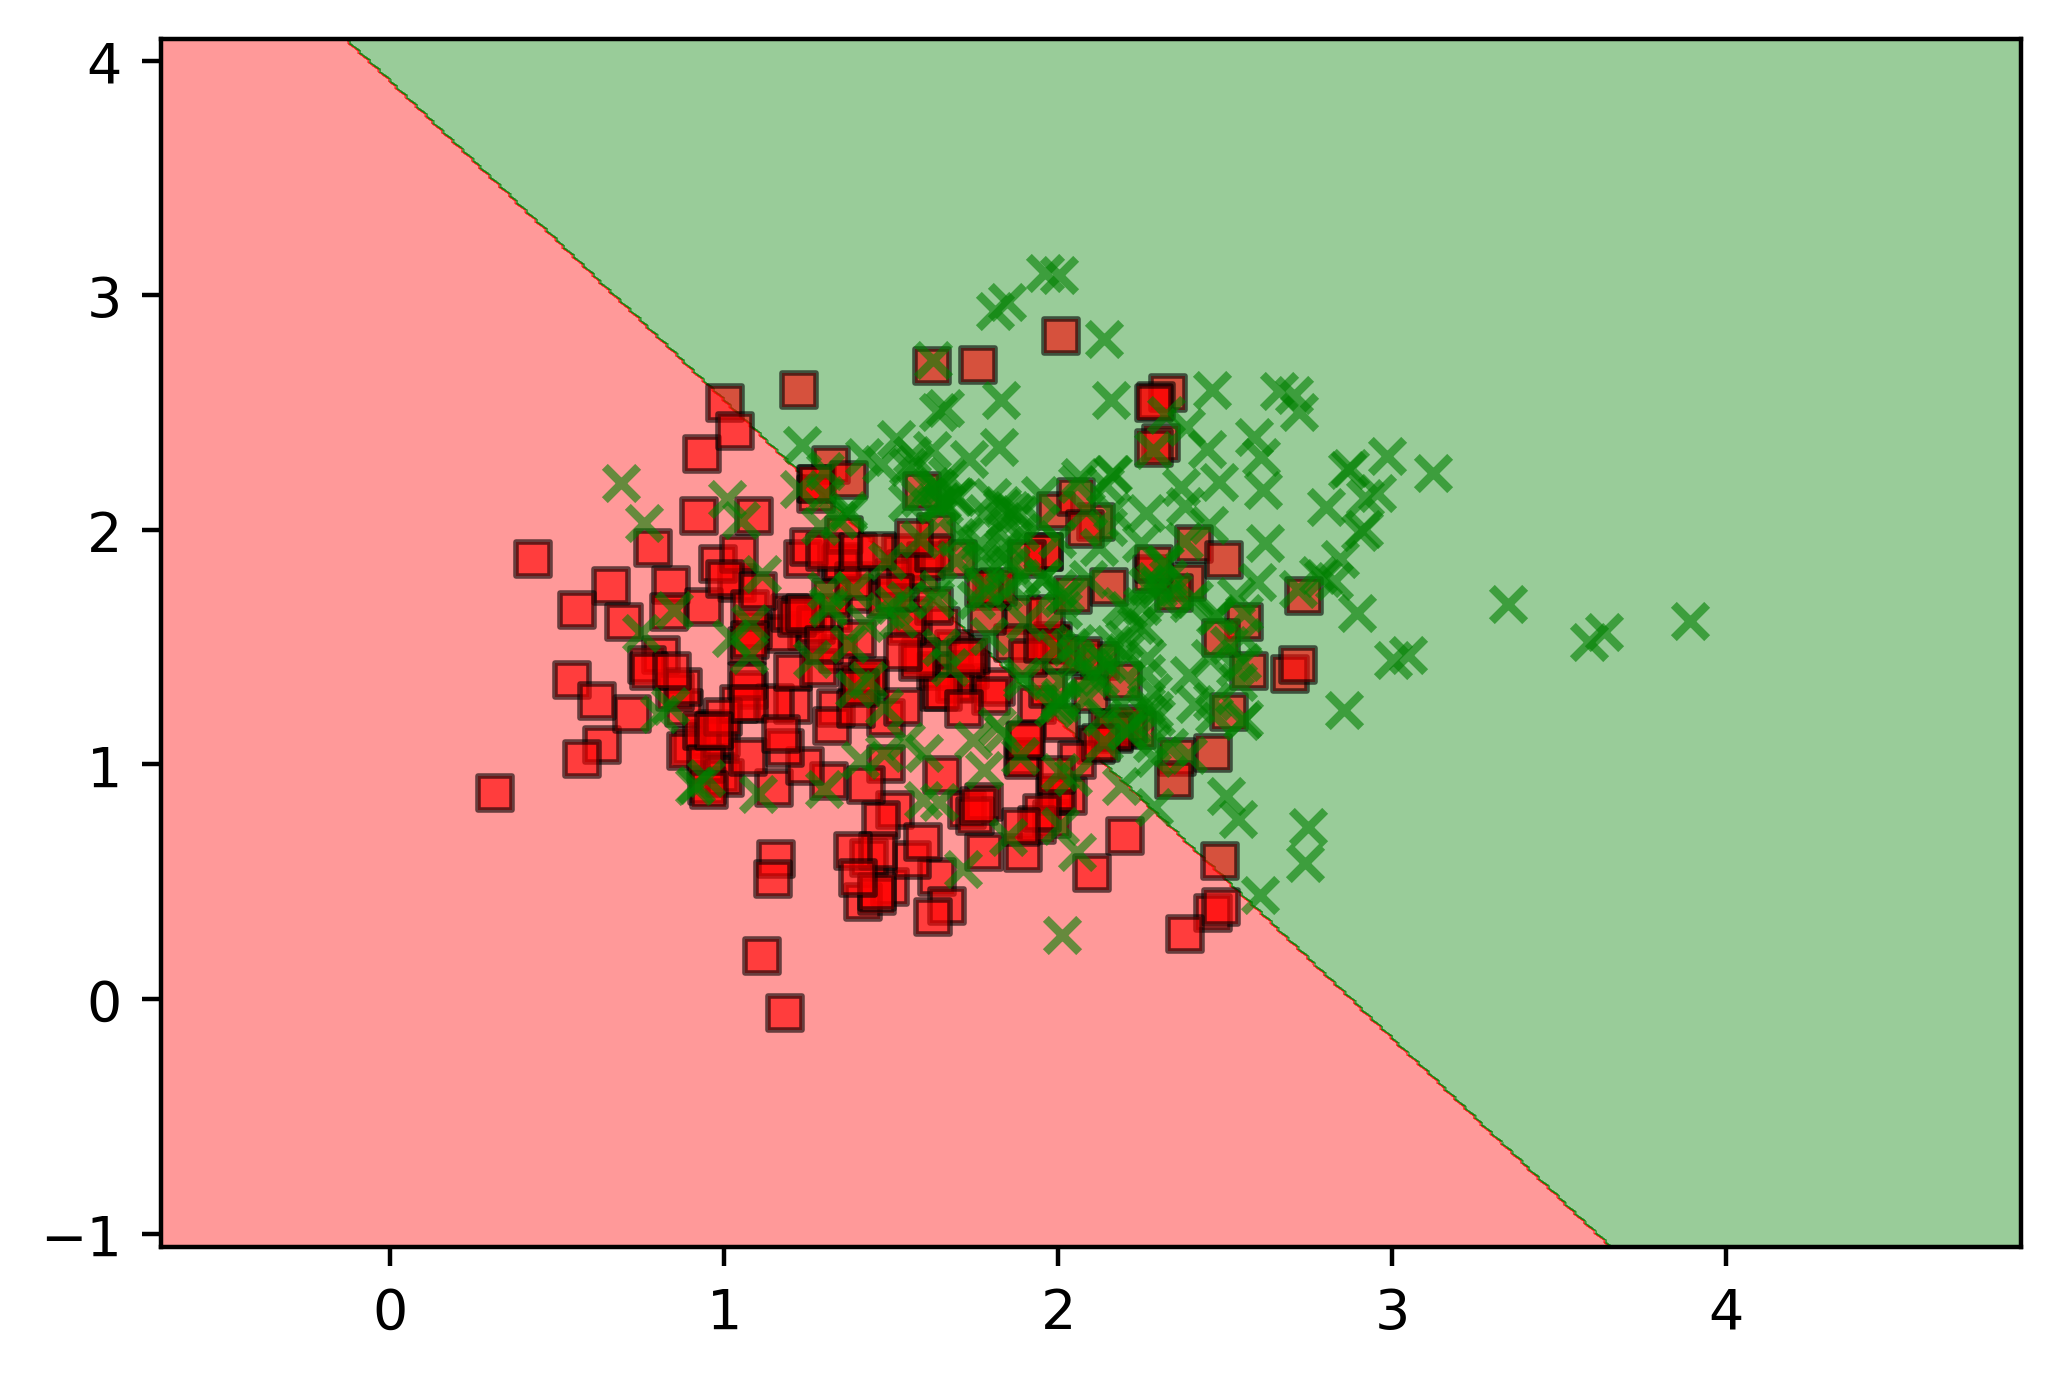

In [25]:
def plot_regions(x, y, resolution=0.2):
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['r', 'g', 'b', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    x2_min, x2_max = x[:, 2].min() - 1, x[:, 2].max() + 1
    '''x1_min, x1_max =-2,2
    x2_min, x2_max =-2,2'''
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    alignment =[1]*len(xx1.ravel())
    alignment=np.array(alignment)
    z = classify(np.array([alignment,xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
 
    for idx, cc in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cc, 1],
                    y=x[y == cc, 2],
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cc)
    plt.show()
plot_regions(x_train,y_train,resolution=0.01)

+ Wideo-Hoff算法（梯度下降）

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


C:\Users\LYX\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


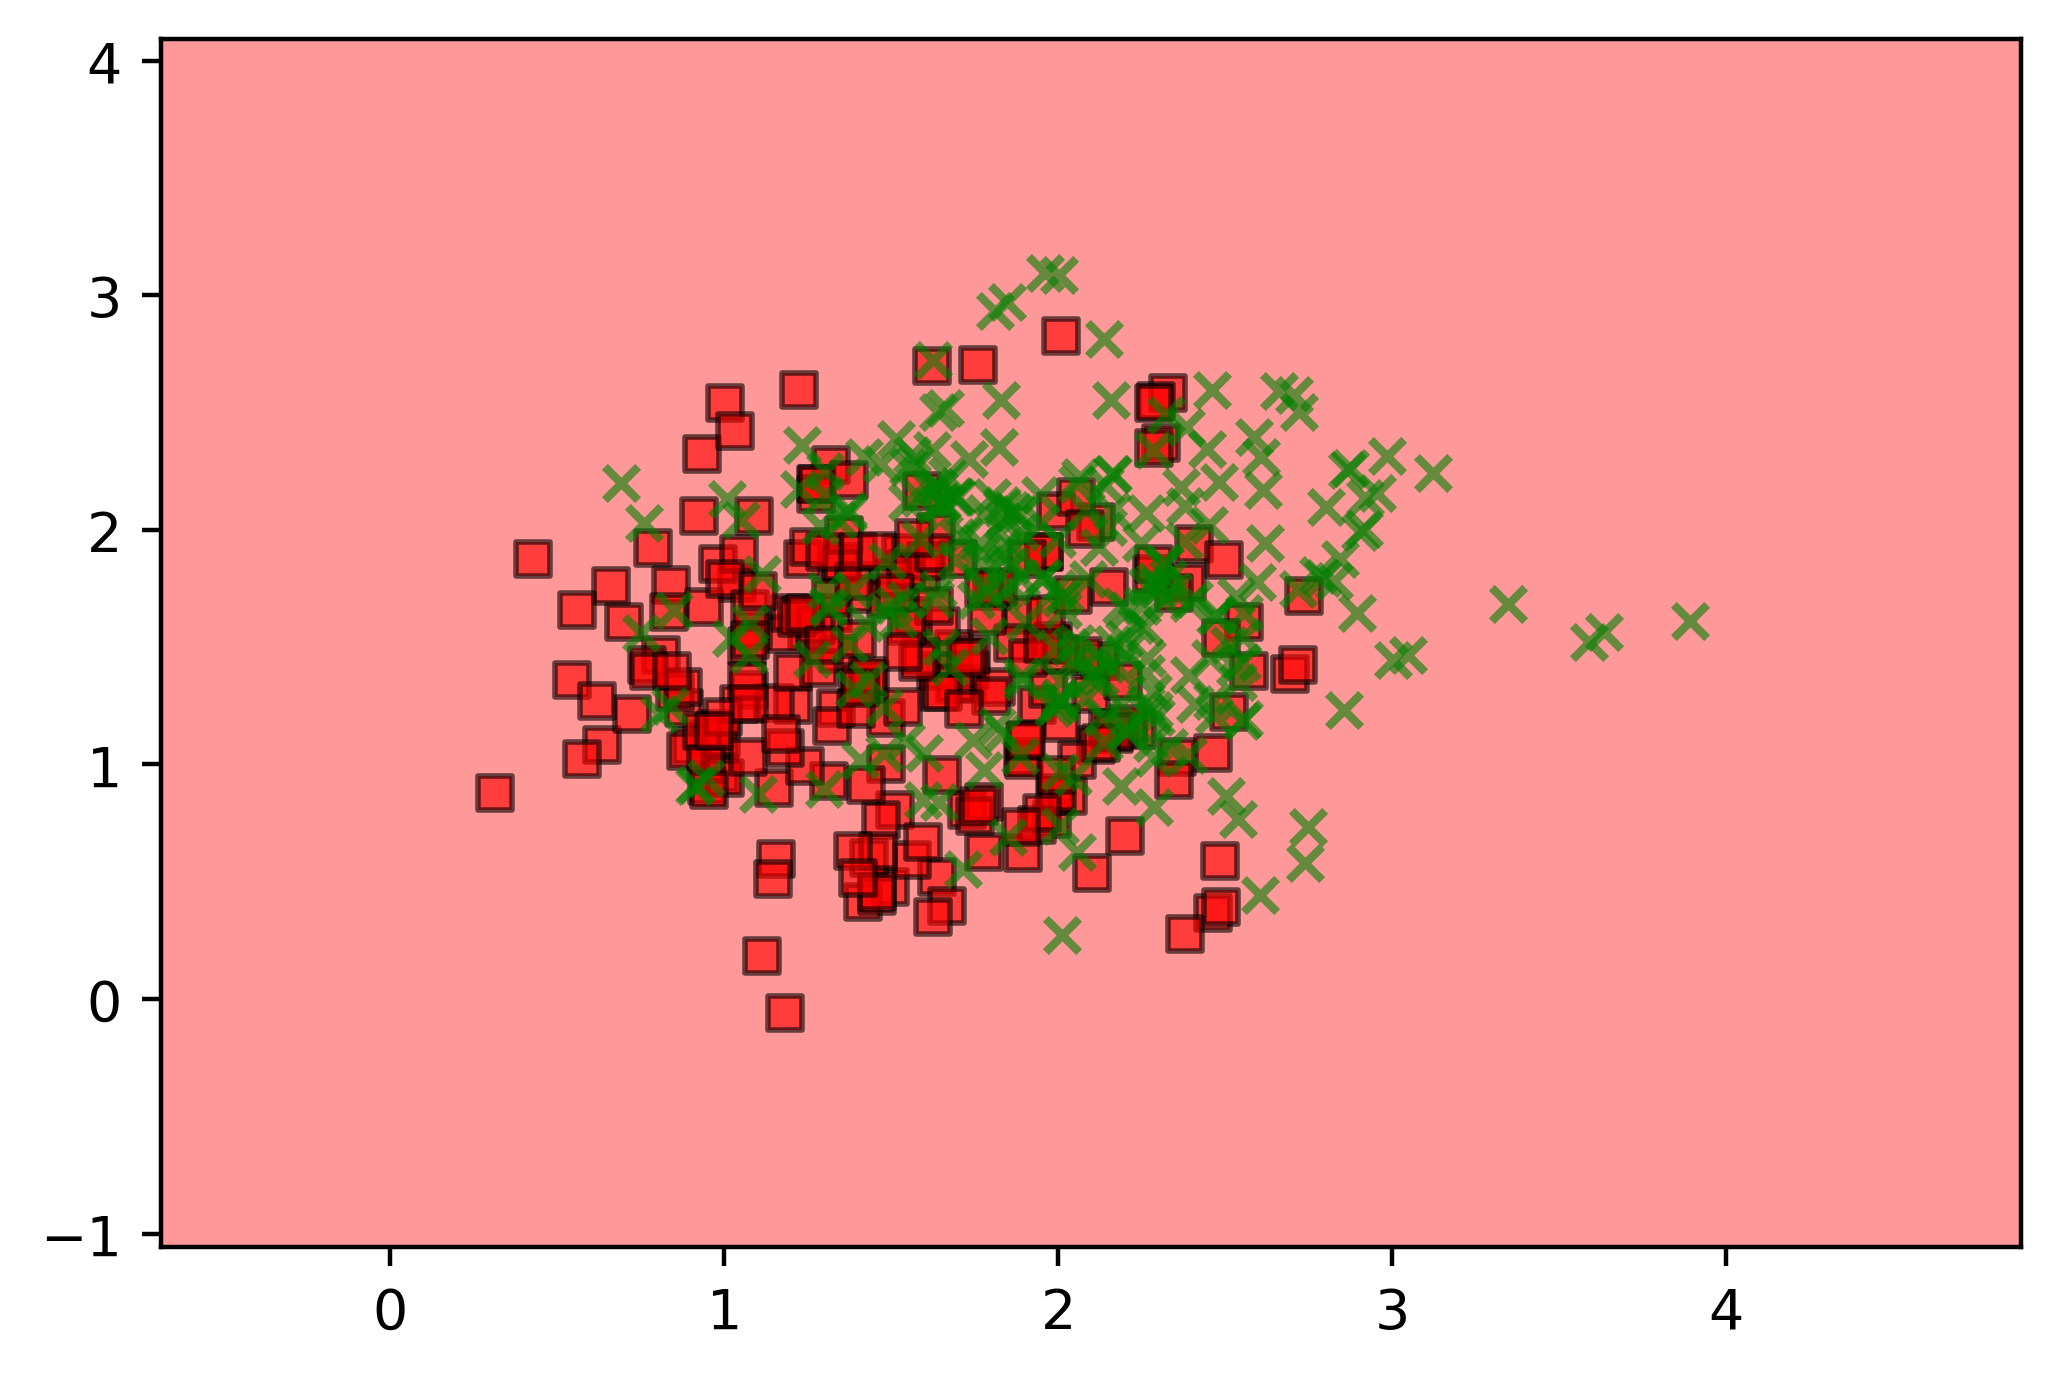

In [30]:
alpha=np.random.random([3,1])
alpha_last=np.random.random([3,1])
alpha=np.matrix(alpha)
alpha_last=np.matrix(alpha_last)
while(np.linalg.norm(alpha-alpha_last)>0.01):
    #step=float(np.abs(alpha.T*x_j)/np.linalg.norm(x_j,ord=2))
    step=1
    print(step)
    alpha_last=alpha
    alpha=alpha_last-step*(Y.T*(Y*alpha_last-b))
plot_regions(x_train,y_train,resolution=0.01)

In [27]:
alpha=np.random.random([3,1])
alpha_last=np.random.random([3,1])
alpha=np.matrix(alpha)
alpha_last=np.matrix(alpha_last)
while(np.linalg.norm(alpha-alpha_last)>0.01):
    for i in range(len(x_new)):
        x_j=np.matrix([[x_new[i][0]],[x_new[i][1]],[x_new[i][2]]])
        g=alpha.T*x_j
        
        print(g)
        step=float(np.abs(alpha.T*x_j)/np.linalg.norm(x_j,ord=2))
        #step=1
        print(step)
        alpha_last=alpha
        alpha=alpha_last-step*int(b[i]-alpha_last.T*x_j)*x_j

[[1.66858791]]
0.664112441907367
[[1.04286668]]
0.5897230902520485
[[1.70088388]]
0.5489569451654277
[[1.22592357]]
0.48979961519477333
[[-1.42471589]]
0.4908529043036635
[[-8.55407658]]
3.300781237412387
[[228.48878582]]
78.51380617306292
[[124007.1056877]]
51518.45273489724
[[3.15697725e+10]]
13703203127.48191
[[1.67785116e+21]]
9.469536053744282e+20
[[7.91007989e+42]]
2.720299366147092e+42
[[1.18155877e+86]]
5.957516953041416e+85
[[-5.07111662e+172]]
1.3369875552821078e+172
[[-inf]]
inf


OverflowError: cannot convert float infinity to integer